In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [90]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [91]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [92]:
df.shape

(7043, 21)

In [112]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [94]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [95]:
df["Churn"].value_counts(normalize=True)*100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

Data is **midly imbalanced**= 73 : 27

In [96]:
df.drop(columns=['customerID'],inplace=True)

*Totalcharge data type is object but it should be integer or float*

*Seniorcitizen has two category named as 0 and 1 .so better uunderstanding convert into no and yes*

In [97]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

In [98]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

*Since null value in  total charge feature  is very low we can ignore .*

*only 11 null value percentage in features Totalcharge  in too low(0.15%). so we can ignore it .*

In [99]:
df.dropna(how='any',inplace=True)

In [100]:
df.duplicated().sum()

np.int64(22)

In [111]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


*75% customers have tenure less than 55 months*

*Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month*

***UNIVARIATE ANALYSIS***

**ategorical Feature

In [101]:

categorical_columns = [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

In [102]:
churn_df=df[df["Churn"]=="Yes"]

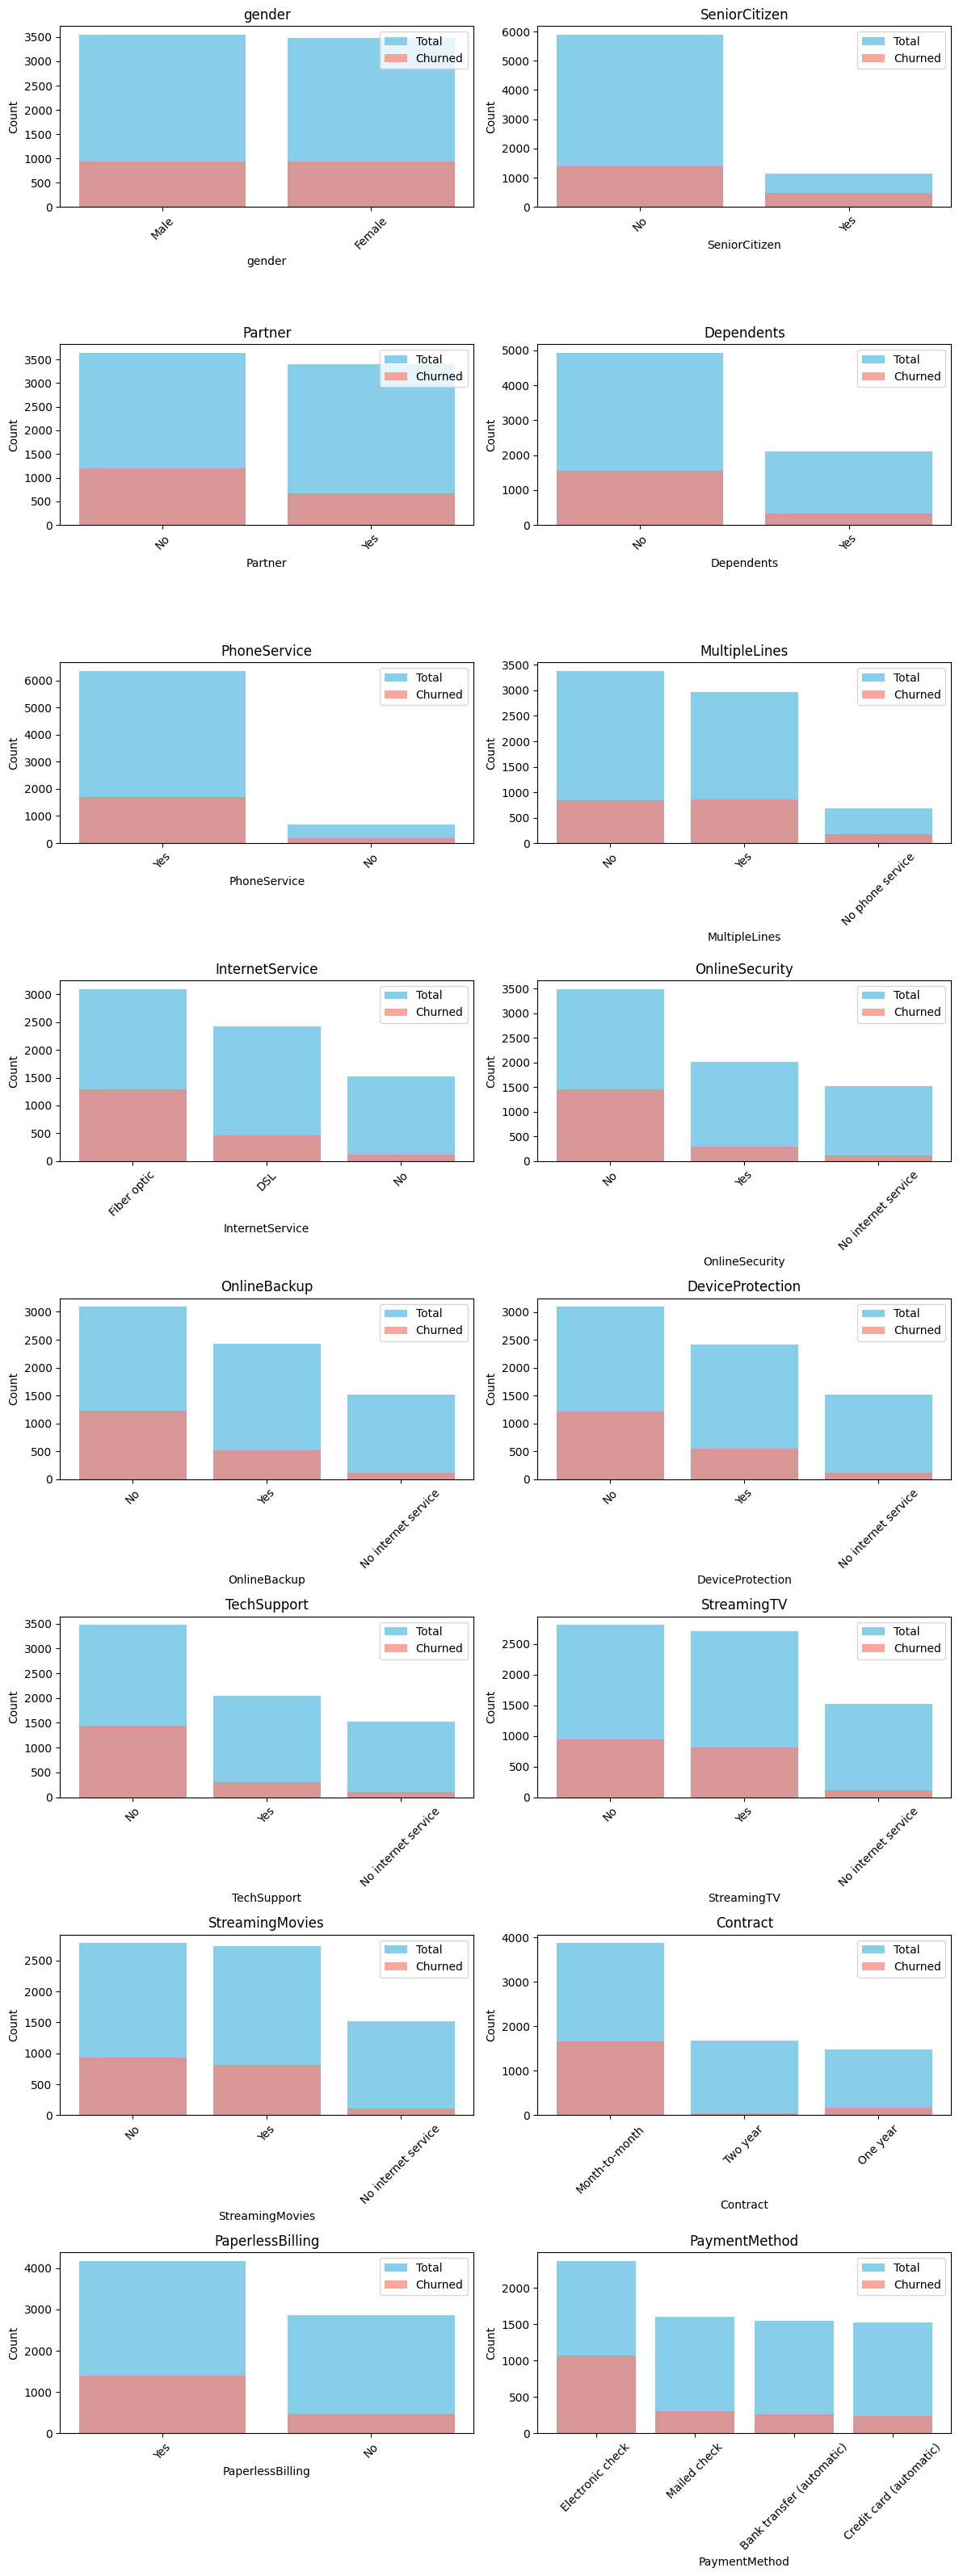

In [105]:


n_rows = (len(categorical_columns) + 1) // 2
plot_no=1
plt.figure(figsize=(12, n_rows * 4))
for col in categorical_columns:
    plt.subplot(n_rows, 2, plot_no)

    # Get value counts
    total = df[col].value_counts()
    churned = churn_df[col].value_counts()

    # Plot bars
    plt.bar(total.index, total.values, label='Total', color='skyblue')
    plt.bar(churned.index, churned.values, label='Churned', color='salmon', alpha=0.7)

    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend()
    plot_no +=1

plt.tight_layout()
plt.show()


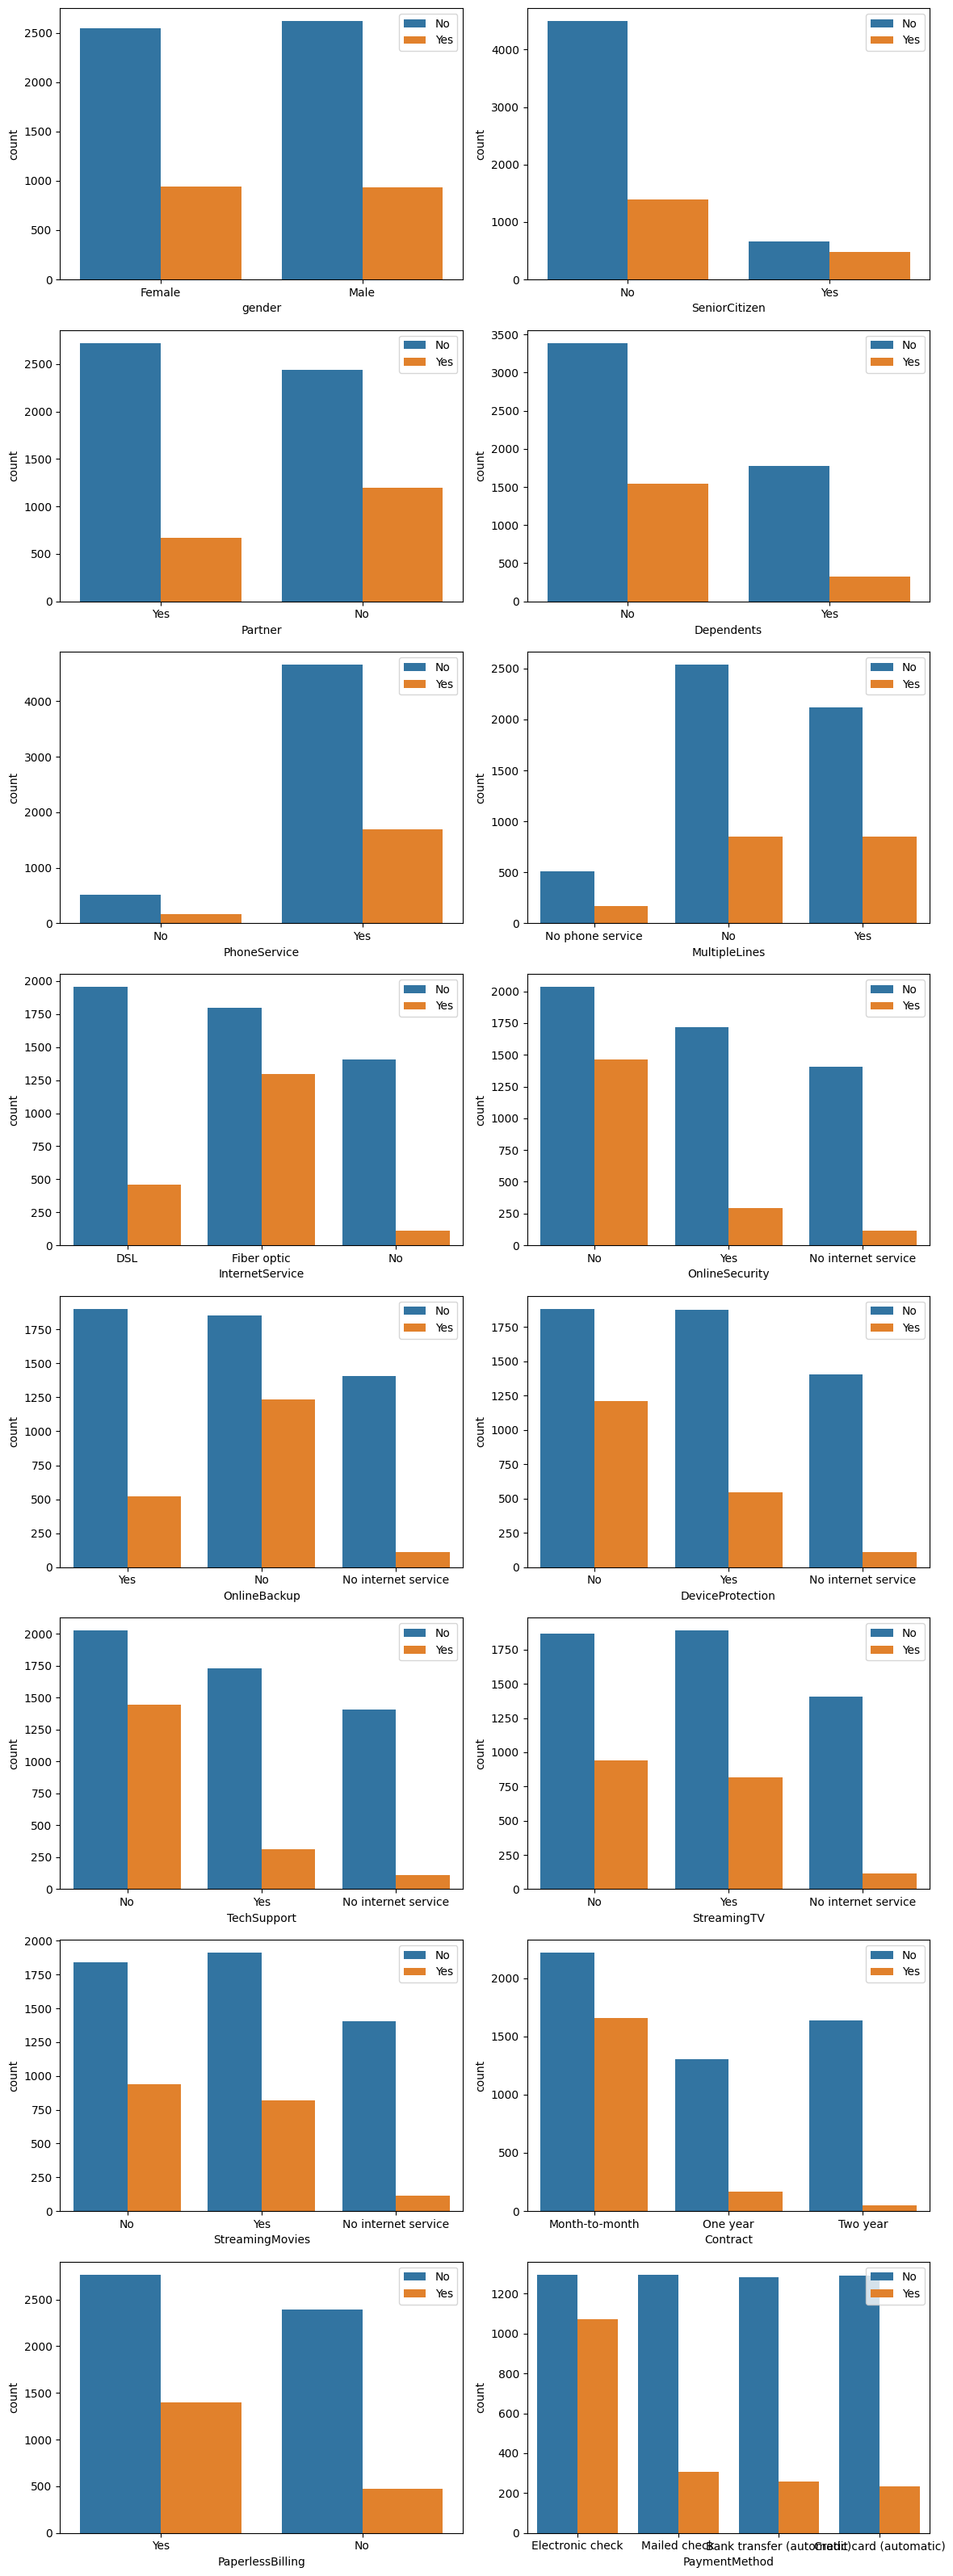

In [106]:
n_rows = (len(categorical_columns) + 1) // 2
plot_no=1
plt.figure(figsize=(12, n_rows * 4))
for col in categorical_columns:
    plt.subplot(n_rows, 2, plot_no)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.legend()
    plot_no +=1

plt.tight_layout()
plt.show()

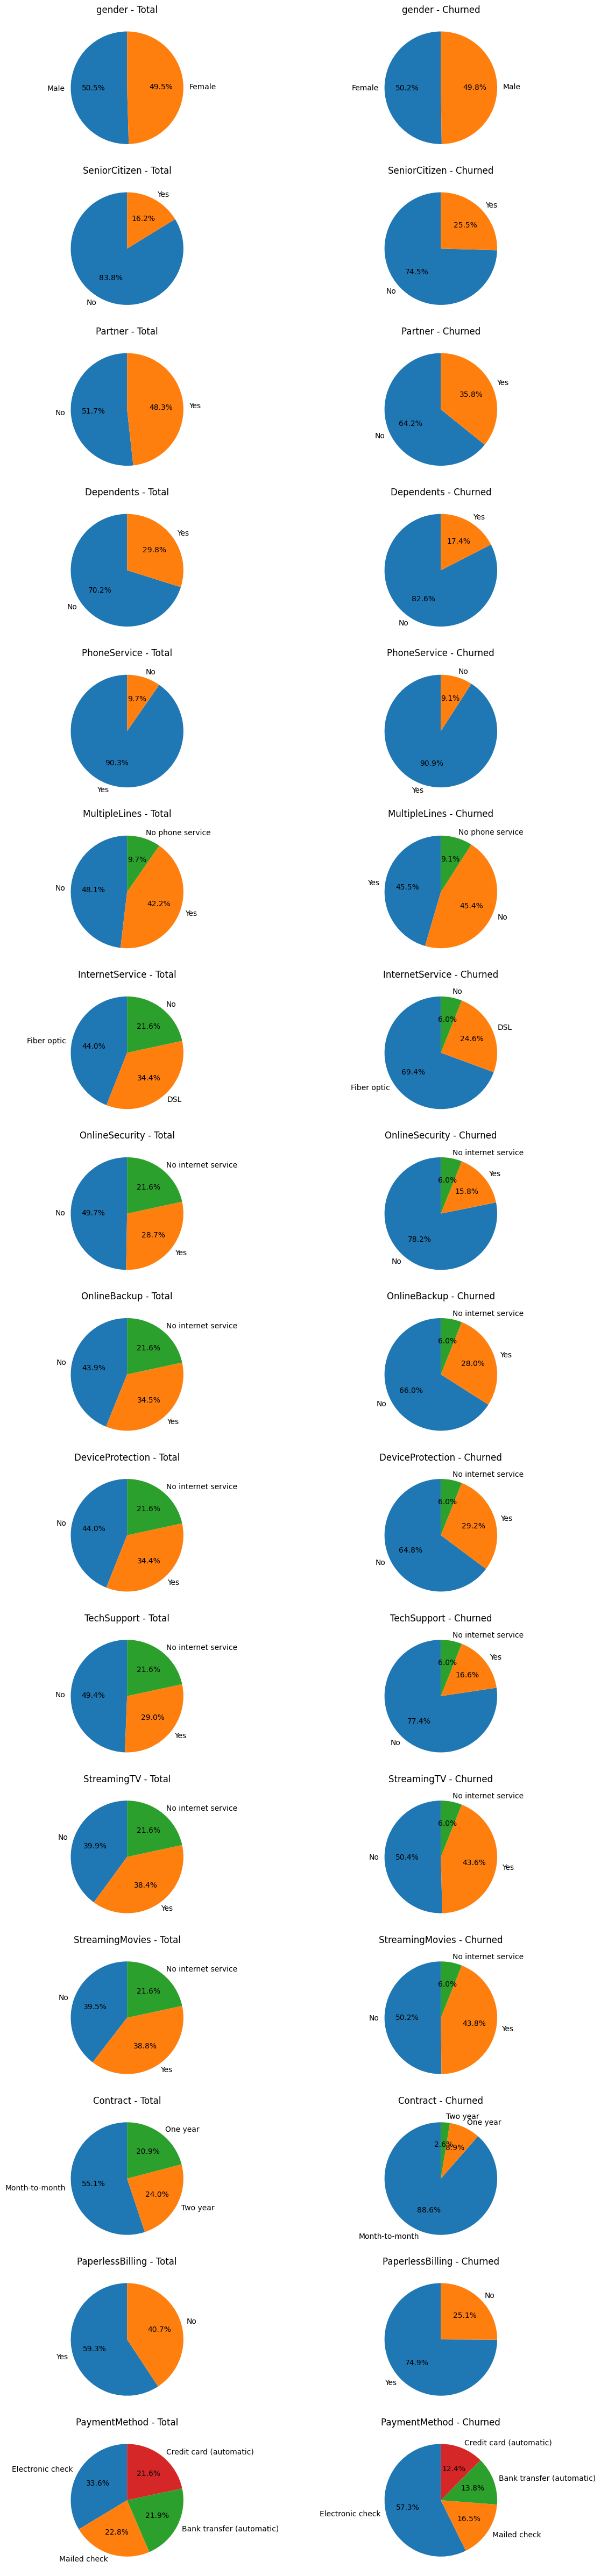

In [107]:

n_cols = 2
n_rows = len(categorical_columns)

plt.figure(figsize=(12, n_rows * 3))

plot_no = 1

for col in categorical_columns:
    total = df[col].value_counts()
    churned = churn_df[col].value_counts()

    # Pie chart for total
    plt.subplot(n_rows, n_cols, plot_no)
    plt.pie(total.values, labels=total.index, autopct="%0.1f%%", startangle=90)
    plt.title(f'{col} - Total')
    plot_no += 1

    # Pie chart for churned
    plt.subplot(n_rows, n_cols, plot_no)
    plt.pie(churned.values, labels=churned.index, autopct="%0.1f%%", startangle=90)
    plt.title(f'{col} - Churned')
    plot_no += 1

plt.tight_layout()
plt.show()


***Conclusion***  

**online sequirity**- The person having "No" are more prone to churn

**online backup** - The person having "no" are more prone to churn

**payment Method** - The person having "Electronic Check" are more prone to churn

**paperless billing** - The person having "yes" are more prone to churn

**contract** - The person having "month  by month" are more prone to churn

**Tech support** - The person having "no" are more prone to churn

**Device Protection** - The person having "no" are more prone to churn

**Intenet Service**  - The person having "fibre optics" are more prone to churn

**Partner** - The person having "no" more prone to churn 

**Dependents** - The person having "no" more prone to churn 



